<a href="https://colab.research.google.com/github/maryadriennerdrgz/Linear-Algebra-Compilation/blob/master/Rodriguez_Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Algebra for CpE**
##**Laboratory 10 : Linear Transformations** <br>
Now that you have a understood the fundamentals of matrices and their operations we can move on to a more conceptual and practical application of linear algebra. <br>
<br>
######**Objectives**
At the end of this activity you will be able to:
1. Be familiar with the role of matrix operations.
2. Visualize matrix operations.
3. Justify the precedence of matrix operations through Python.


#**Discussion**

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
%matplotlib inline

#**Transformation**

You can recall that a vector can be scaled or translated through different vector operations. We'll now dwell more on the translation and transformation of multi-dimensional vectors (i.e. matrices). This is possible using matrix operations. Take note that not all operations to matrices or $\mathbb{R}^2$ vectors are linear. Linear transformations leave the origin fixed and preserve parallelism. Scaling, shearing, rotation and reflexion of a plane are examples of linear transformations. Let's try to revisit them in this notebook.

References:<br>
[Linear transformations in Numpy](https://mmas.github.io/linear-transformations-numpy)

#**Geometric Translation**

There are two prime requirements for linear geometric translations:

1. Vectors remain linear upon applying the linear function
2. The origin of the vector does not change.<br>

To make representation easier, I have provided a user-defined function for plotting the quivers of the vectors. The function takes in the matrix we wish to transform and a transformation matrix. If no transformation matrix is provided, the default is an identity matrix.


In [25]:
def plot_quiv(x,t_mat=np.eye(2)):
    x_prime = x @ t_mat
    size= (2,2)
    plt.figure(figsize=(4,4))

    plt.xlim(-size[0],size[0])
    plt.ylim(-size[1],size[1])
    plt.xticks(np.arange((-size[0]), size[0]+1, 1.0))
    plt.yticks(np.arange((-size[1]), size[1]+1, 1.0))


    plt.quiver([0,0],[0,0], x_prime[:,0], x_prime[:,1], 
               angles='xy', scale_units='xy',scale=1, 
               color=['red','blue'])## use column spaces
    plt.grid()
    plt.show()

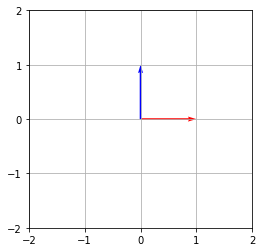

In [26]:
A = np.array([
    [1, 0],
    [0, 1]
])

plot_quiv(A)

#**Repositioning/Translation**

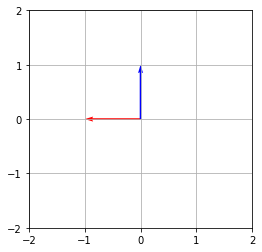

In [11]:
t_mat = np.array([
    [-1,0],
    [0,1]
])
plot_quiv(A, t_mat)

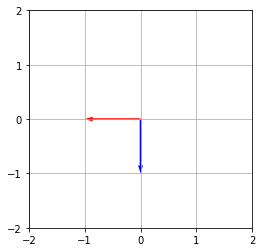

In [ ]:
t_mat = np.array([
    [-1,0],
    [0,-1]
])
plot_quiv(A, t_mat)


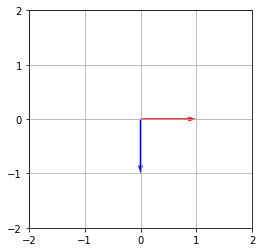

In [ ]:
t_mat = np.array([
    [1,0],
    [0,-1]
])
plot_quiv(A, t_mat)

#**Shears**

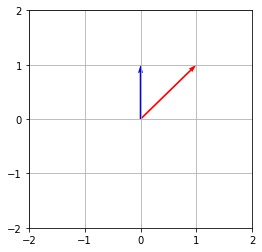

In [ ]:
shear = np.array([
    [1,1],
    [0,1]
])
plot_quiv(A, shear)

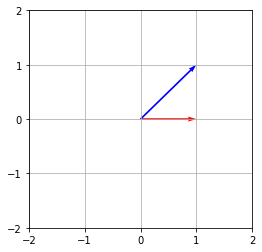

In [ ]:
shear = np.array([
    [1,0],
    [1,1]
])
plot_quiv(A, shear)


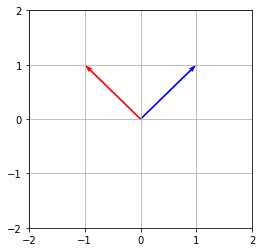

In [ ]:
shear = np.array([
    [-1,1],
    [1,1]
])
plot_quiv(A, shear)

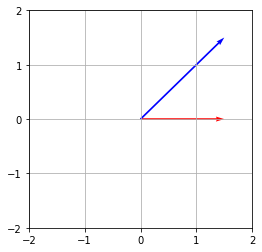

In [ ]:
shear = np.array([
    [1.5,0],
    [1.5,1.5]
])
plot_quiv(A, shear)

#**Scaling**

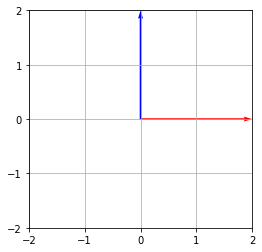

In [ ]:
scale = np.array([
    [2,0],
    [0,2]
])
plot_quiv(A, scale)

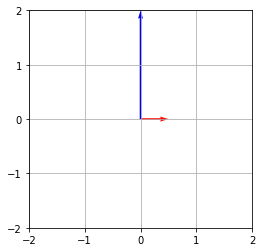

In [ ]:
scale = np.array([
    [0.5,0],
    [0,2]
])
plot_quiv(A, scale)

#**Rotation**

In [ ]:
def rot_matrix(theta):
    theta = np.deg2rad(theta)
    rot_mat = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])
    return rot_mat

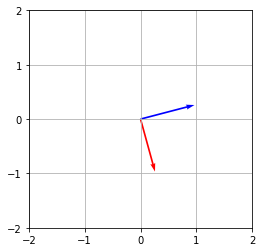

In [ ]:
r_mat = rot_matrix(75)
plot_quiv(A, r_mat)

#**3D Transformations**

In [ ]:
def plot_3d_quiv(x, t_mat=np.eye(3)):
    x_prime = x @ t_mat
    fig = plt.figure(figsize=(5,5))
    ax1 = fig.gca(projection='3d')
    ax1.set_xlim([-2, 2])
    ax1.set_ylim([-2, 2])
    ax1.set_zlim([-2, 2])
    ax1.set_xlabel("X (roll)")
    ax1.set_ylabel("Y (pitch)")
    ax1.set_zlabel("Z (yaw)")

    origin = (0,0,0)
    ax1.quiver(origin, origin, origin, x_prime[:,0], x_prime[:,1], x_prime[:,2], 
               arrow_length_ratio=0.1, colors=['red','blue','green'])
    plt.grid()
    plt.show()

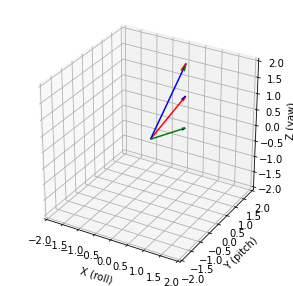

In [ ]:
X = np.eye(3)
t_mat = np.array([
    [0.5,1,1],
    [0.5,1,2],
    [0.5,1,0]
])
plot_3d_quiv(X, t_mat)

In [ ]:
def rot_matrix_3d(theta1, theta2, theta3):
    alpha = [np.deg2rad(theta1), np.deg2rad(theta2), np.deg2rad(theta3)]
    roll = np.array([
        [1,0,0],
        [0, np.cos(alpha[0]), -np.sin(alpha[0])],
        [0, np.sin(alpha[0]), np.cos(alpha[0])]
    ])
    pitch = np.array([
        [np.cos(alpha[1]), 0, np.sin(alpha[1])],
        [0 ,1 ,0],
        [-np.sin(alpha[1]), 0, np.cos(alpha[1])]
    ])
    yaw = np.array([
        [np.cos(alpha[2]), -np.sin(alpha[2]), 0],
        [np.sin(alpha[2]), np.cos(alpha[2]), 0],
        [0,0,1]
    ])
    res = roll @ pitch @ yaw
    return roll, pitch, yaw, res

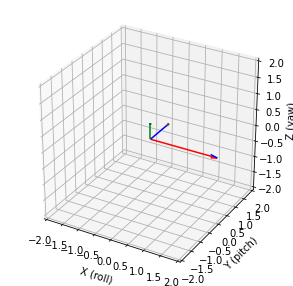

In [ ]:
r_x, r_y, r_z, r_mat = rot_matrix_3d(0,0,0)
M = np.array([
    [2,0,0],
    [0,1,0],
    [0,0,0.5]
])
plot_3d_quiv(M, r_mat)

##**Supplementary Activity**
<br>

Try to implement the linear transformations using spancs using the scatterplot view. Just do at least one example of linear transformation for a 2D space.

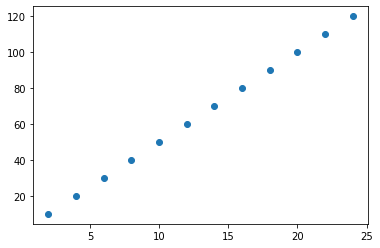

In [20]:
import matplotlib.pyplot as plt

x = [2,4,6,8,10,12,14,16,18,20,22,24]
y = [10,20,30,40,50,60,70,80,90,100,110,120]

plt.scatter(x, y)
plt.show()

In [39]:
AA = np.array([
    [-1, 0],
    [1.5, 2]
])

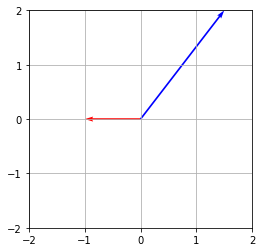

In [40]:
plot_quiv(AA)

In [41]:
scale = np.array([
    [1,2],
    [6,5]
])

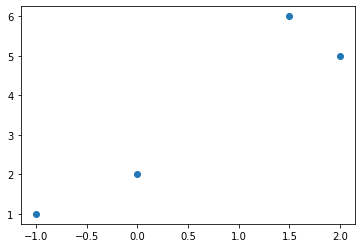

In [42]:
plt.scatter(AA, scale)
plt.show()